In [ ]:
import random
import seaborn as sns
import PIL
import IPython.display as ipd
import glob
import h5py
import plotly.graph_objs as go
import plotly.express as px
from tempfile import mktemp

from IPython.display import Image, display
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing import image
from random import shuffle
from sklearn.model_selection import train_test_split
import cv2
import math
import os
import pathlib
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers, layers, Model, optimizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Conv2DTranspose, concatenate, Input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as slf
from math import pi
from PIL import Image
import cv2
%matplotlib inline
np.random.seed(2)

In [ ]:
X = np.load("/content/drive/MyDrive/dataset/images.npy")

In [ ]:
y = []
for img in X:
  im = cv2.GaussianBlur(img, (3, 3), 7)
  y.append(im)

In [ ]:
y = np.array(y)

In [ ]:
from google.colab.patches import cv2_imshow

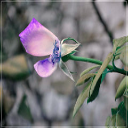

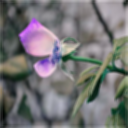

In [ ]:
cv2_imshow(X[2])
cv2_imshow(y[2])

In [ ]:
img_size = (128, 128, 3)
inputs = Input(shape=img_size)

In [ ]:
def build_model(input_layer, start_neurons):
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
    tconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
    tconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(tconv1)
    conv1 = concatenate([tconv1, conv1])

    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    tconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(conv2)
    tconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(tconv2)
    conv2 = concatenate([tconv2, conv2])

    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
    tconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(conv3)
    tconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(tconv3)
    conv3 = concatenate([tconv3, conv3])
    
    pool3 = MaxPooling2D((2, 2))(conv3)

    convm = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)
    tconvm = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(convm)
    tconvm = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(tconvm)
    convm = concatenate([tconvm, convm])

    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = MaxPooling2D(pool_size=(2, 2))(uconv1)
    uconv1 = Conv2D(12, (3, 3), activation="relu", padding="same")(uconv1)
    output_layer = tf.keras.layers.Lambda(lambda t:tf.nn.depth_to_space(t,2))(uconv1)
    model = Model(input_layer, output_layer)
    return model

In [ ]:
model = build_model(inputs, 64)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
model.compile(loss = "mse", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
model.fit(y, X, epochs = 500, batch_size = 32, verbose=1, validation_split=0.1)

Epoch 1/500
3/3 [==============================] - 41s 8s/step - loss: 22414.7383 - accuracy: 0.2089 - val_loss: 11031.6855 - val_accuracy: 0.3837
Epoch 2/500
3/3 [==============================] - 3s 1s/step - loss: 8804.1699 - accuracy: 0.4261 - val_loss: 8076.0850 - val_accuracy: 0.3830
Epoch 3/500
3/3 [==============================] - 3s 1s/step - loss: 5825.4180 - accuracy: 0.4356 - val_loss: 4778.1396 - val_accuracy: 0.3986
Epoch 4/500
3/3 [==============================] - 3s 1s/step - loss: 3917.6013 - accuracy: 0.4909 - val_loss: 3321.9946 - val_accuracy: 0.4948
Epoch 5/500
3/3 [==============================] - 3s 1s/step - loss: 2675.2424 - accuracy: 0.5698 - val_loss: 2717.0925 - val_accuracy: 0.5448
Epoch 6/500
3/3 [==============================] - 3s 1s/step - loss: 1907.0404 - accuracy: 0.5770 - val_loss: 2869.4395 - val_accuracy: 0.5082
Epoch 7/500
3/3 [==============================] - 3s 1s/step - loss: 1749.4342 - accuracy: 0.5595 - val_loss: 2797.7036 - val_accura

In [ ]:
model.save("/content/drive/MyDrive/dataset/model/IIM_1")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset/model/IIM_1/assets


In [ ]:
def read_image(img_path):
  img = cv2.imread(img_path)
  img.resize((128, 128, 3))
  return img

In [ ]:
url = "/content/drive/MyDrive/dataset/model/imgnew.jpg"
img = read_image(url)

In [ ]:
def read_blur_img(img_path, noise):
  img = cv2.imread(img_path)
  img.resize((128, 128, 3))
  return cv2.GaussianBlur(img, (3, 3), noise)

In [ ]:
url = "/content/drive/MyDrive/dataset/model/imgnew.jpg"
blur = read_blur_img(url)

In [ ]:
blur = []
for i in range(10):
  blur.append(read_blur_img(url, i))

In [ ]:
def resize_to_fit():
  for img in blur:
    img.resize((1, 128, 128, 3))

In [ ]:
resize_to_fit()

In [ ]:
pred_img = []
for img in blur:
  pred_img.append(model.predict(img))

In [ ]:
def fit_img():
  for img in pred_img:
    img.resize((128, 128, 3))

In [ ]:
fit_img()

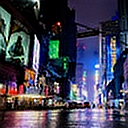

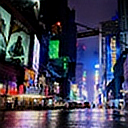

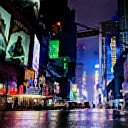

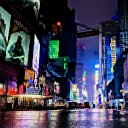

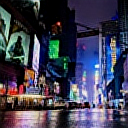

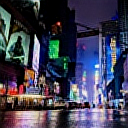

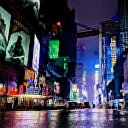

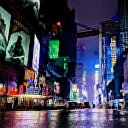

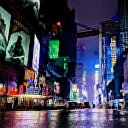

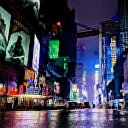

In [ ]:
  for img in pred_img:
  cv2_imshow(img)

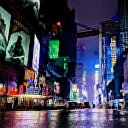

In [ ]:
cv2_imshow(img)

In [ ]:
def resize_blur_image_to_org():
  for img in blur:
    img.resize((128, 128, 3))

In [ ]:
resize_blur_image_to_org()

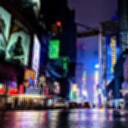

In [ ]:
cv2_imshow(blur[5])